In [69]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.io import loadmat 
from scipy.stats import spearmanr
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.axes_grid1 import ImageGrid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load choice matrices 
cmats = loadmat('datasets/human_choices.mat')

In [17]:
x = 1
y = 2
if (x==1) and (y ==2):
    print('hello world')

hello world


Text(0.5, 1.0, 'Interleaved - Task B')

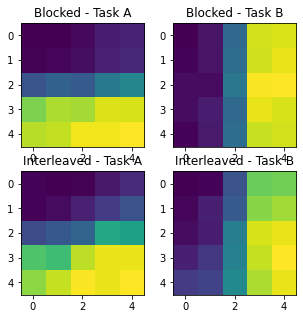

In [4]:
cmats.keys()
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.imshow(cmats['cmat_b_north'].mean(0))
plt.title('Blocked - Task A')

plt.subplot(2,2,2)
plt.imshow(cmats['cmat_b_south'].mean(0))
plt.title('Blocked - Task B')

plt.subplot(2,2,3)
plt.imshow(cmats['cmat_i_north'].mean(0))
plt.title('Interleaved - Task A')

plt.subplot(2,2,4)
plt.imshow(cmats['cmat_i_south'].mean(0))
plt.title('Interleaved - Task B')


In [28]:
# load sluggish net results 
with open('fit_sluggishness_results.pkl','rb') as f:
    results = pickle.load(f)

In [29]:
losses = []
corrs = []
outputs = []
for r in results:
    losses.append(r[:2])
    corrs.append(r[2:4])
    outputs.append(r[4])
corrs = np.array(corrs)
losses = np.array(losses)

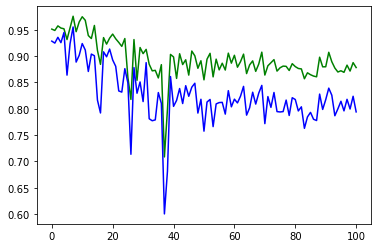

In [36]:
%matplotlib inline
plt.plot(corrs[:,1],'g-')
plt.plot(corrs[:,0],'b-')

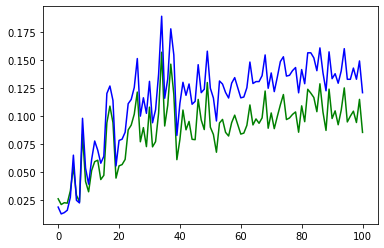

In [37]:
%matplotlib inline
plt.plot(losses[:,1],'g-')
plt.plot(losses[:,0],'b-')

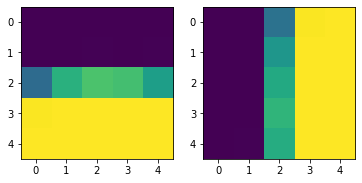

In [33]:
%matplotlib inline
choices = outputs[0]
f,ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].imshow(choices[:25].reshape(5,5))
ax[1].imshow(choices[25:].reshape(5,5))

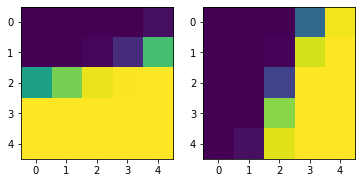

In [39]:
choices = outputs[5]
f,ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].imshow(choices[:25].reshape(5,5))
ax[1].imshow(choices[25:].reshape(5,5))

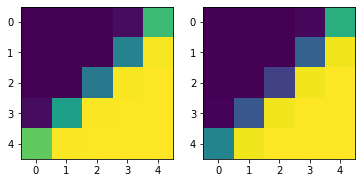

In [35]:
choices = outputs[-1]
f,ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].imshow(choices[:25].reshape(5,5))
ax[1].imshow(choices[25:].reshape(5,5))

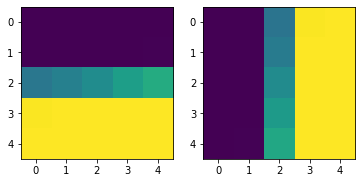

In [66]:
cmats_a = []
cmats_b = []
for r in np.arange(0,30):
    with open('checkpoints/sluggish_sla_int_sv0/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        choices = results['all_y_out'][1,:]
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
f,ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].imshow(cmats_a.mean(0))
ax[1].imshow(cmats_b.mean(0))

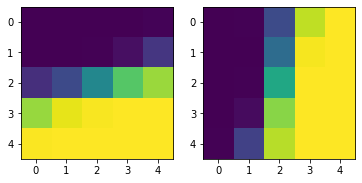

In [67]:
cmats_a = []
cmats_b = []
for r in np.arange(0,30):
    with open('checkpoints/sluggish_sla_int_sv5/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        choices = results['all_y_out'][1,:]
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
f,ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].imshow(cmats_a.mean(0))
ax[1].imshow(cmats_b.mean(0))

In [73]:
choicemats = loadmat('datasets/human_choices.mat')
cmat_a = choicemats['cmat_b_north'].mean(0)
cmat_b = choicemats['cmat_b_south'].mean(0)
choices_blocked = np.hstack((cmat_a.flatten(),cmat_b.flatten()))    
cmat_a = choicemats['cmat_i_north'].mean(0)
cmat_b = choicemats['cmat_i_south'].mean(0)
choices_interleaved = np.hstack((cmat_a.flatten(),cmat_b.flatten()))   

choices_mod = np.hstack((cmats_a.mean(0).flatten(),cmats_b.mean(0).flatten()))
spearmanr(choices_interleaved,choices_mod)[0]

0.9705282676846235

In [99]:
sluggish_vals = np.arange(0,31)
corrs_int = []
corrs_blocked = []
corrs_all_b = []
corrs_all_i = []
for sv in sluggish_vals:
    cmats_a = []
    cmats_b = []
    corrs_run_b = []
    corrs_run_i = []
    for r in np.arange(0,30):
        with open('checkpoints/sluggish_sla_int_sv'+ str(sv) + '/run_' + str(r) +'/results.pkl','rb') as f:
            results = pickle.load(f)
            choices = results['all_y_out'][1,:]
            cmats_a.append(choices[:25].reshape(5,5))
            cmats_b.append(choices[25:].reshape(5,5))
            corrs_run_b.append(spearmanr(choices_blocked,choices)[0])
            corrs_run_i.append(spearmanr(choices_interleaved,choices)[0])
    cmats_a = np.array(cmats_a)
    cmats_b = np.array(cmats_b)
    choices_mod = np.hstack((cmats_a.mean(0).flatten(),cmats_b.mean(0).flatten()))
    corrs_int.append(spearmanr(choices_interleaved,choices_mod)[0])
    corrs_blocked.append(spearmanr(choices_blocked,choices_mod)[0])
    corrs_all_b.append(corrs_run_b)
    corrs_all_i.append(corrs_run_i)
corrs_all_b = np.array(corrs_all_b)
corrs_all_i = np.array(corrs_all_i)


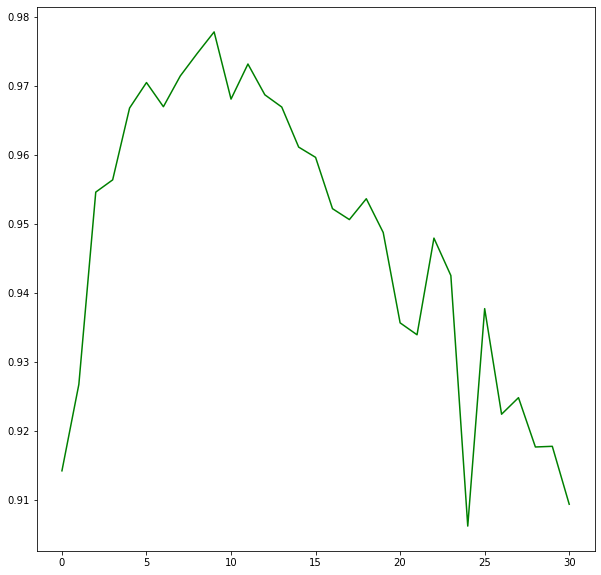

In [105]:
plt.figure(figsize=(10,10))
plt.plot(corrs_int,'g-')
# plt.plot(corrs_blocked,'r-')

todo: perhaps fit avg across runs to individual subjects AND to the model rdms from pnas paper. show slug on x as above and beta weights on y. together with example choice mats perhaps

<ErrorbarContainer object of 3 artists>

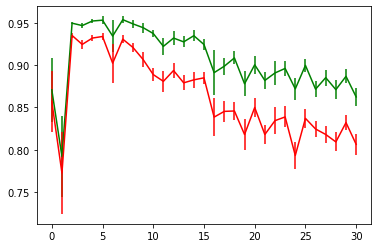

In [104]:

sem = lambda x: np.std(x,axis=1,ddof=1)/np.sqrt(len(x))

plt.figure()

plt.errorbar(np.arange(corrs_all_i.shape[0]),corrs_all_i.mean(1),yerr=sem(corrs_all_i),color='g')
plt.errorbar(np.arange(corrs_all_b.shape[0]),corrs_all_b.mean(1),yerr=sem(corrs_all_b),color='r')